In [1]:
import numpy as np 
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [14]:
df_city=pd.read_csv('data/cities2.csv')
df_station=pd.read_csv('data/stations.csv')
df_providers=pd.read_csv('data/providers.csv')
df_ticket=pd.read_csv('data/tickets2.csv')

In [15]:
df_ticket

,Unnamed: 0,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,...,dep_ts_weekend,day_night_search,day_night_dep,Duree_min,lat_o,long_o,lat_d,long_d,Distance_km,type_transp
0,0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327000+00:00,NaN,...,Friday,0,14,10.0,47.907018,1.906270,43.604452,3.918318,503.136831,carpooling
1,1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,"{149,418}",...,Friday,0,13,50.0,47.907018,1.906270,43.604452,3.918318,503.136831,bus
2,2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,7400,2017-10-01 00:13:40.212000+00:00,"{798,798,6794,6246}",...,Friday,0,13,57.0,47.907018,1.906270,43.604452,3.918318,503.136831,train
3,3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,13500,2017-10-01 00:13:40.213000+00:00,"{798,798,6794,6246}",...,Friday,0,13,35.0,47.907018,1.906270,43.604452,3.918318,503.136831,train
4,4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,7710,2017-10-01 00:13:40.213000+00:00,"{5983,5983}",...,Friday,0,21,46.0,47.907018,1.906270,43.604452,3.918318,503.136831,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74163,74163,6869182,13,279.0,10729.0,2017-10-27 02:30:00+00:00,2017-10-27 16:00:00+00:00,2590,2017-10-19 10:35:42.943000+00:00,"{408,408}",...,Friday,10,2,30.0,48.847702,2.352311,47.248785,-1.520898,339.046766,bus
74164,74164,6869185,9,279.0,304.0,2017-10-27 07:00:00+00:00,2017-10-27 13:30:00+00:00,2700,2017-10-19 10:35:42.943000+00:00,"{1105,1105}",...,Friday,10,7,30.0,48.847702,2.352311,47.248785,-1.520898,339.046766,bus
74165,74165,6869187,8371,10642.0,304.0,2017-10-27 08:30:00+00:00,2017-10-27 15:15:00+00:00,3000,2017-10-19 10:35:42.943000+00:00,"{1105,1105}",...,Friday,10,8,45.0,48.847702,2.352311,47.248785,-1.520898,339.046766,bus
74166,74166,6869189,13,279.0,304.0,2017-10-27 13:25:00+00:00,2017-10-27 21:10:00+00:00,2880,2017-10-19 10:35:42.943000+00:00,"{863,863}",...,Friday,10,13,45.0,48.847702,2.352311,47.248785,-1.520898,339.046766,bus


In [16]:
df_city

,Unnamed: 0,id,local_name,unique_name,latitude,longitude,population,country
0,0,5159,"Padua, Veneto, Italia",padua,45.406435,11.876761,209678.0,Italia
1,1,76,"Barcelona, Cataluña, España",barcelona,41.385064,2.173404,1611822.0,España
2,2,81,"Basel, Basel-Stadt, Schweiz",basel,47.593437,7.619812,NaN,Deutschland
3,3,259,"Erlangen, Bayern, Deutschland",erlangen,49.589674,11.011961,105412.0,Deutschland
4,4,11979,"Balș, Olt, România",balș,44.353354,24.095672,NaN,România
...,...,...,...,...,...,...,...,...
8035,8035,9964,"Saint-André-lez-Lille, Hauts-de-France, France",saint-andre-lez-lille,50.654250,3.047690,NaN,France
8036,8036,10863,"Kiev, Шевченківський район, Ukraine",kiev,50.450100,30.523400,NaN,Україна
8037,8037,11144,"Brighton, England, UK",brighton,50.822000,-0.137400,NaN,United Kingdom
8038,8038,11377,"Manises, Comunitat Valenciana, España",manises,39.493000,-0.462100,NaN,España


In [18]:
df_ticket

,Unnamed: 0,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,...,dep_ts_weekend,day_night_search,day_night_dep,Duree_min,lat_o,long_o,lat_d,long_d,Distance_km,type_transp
0,0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327000+00:00,NaN,...,Friday,0,14,10.0,47.907018,1.906270,43.604452,3.918318,503.136831,carpooling
1,1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773000+00:00,"{149,418}",...,Friday,0,13,50.0,47.907018,1.906270,43.604452,3.918318,503.136831,bus
2,2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,7400,2017-10-01 00:13:40.212000+00:00,"{798,798,6794,6246}",...,Friday,0,13,57.0,47.907018,1.906270,43.604452,3.918318,503.136831,train
3,3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,13500,2017-10-01 00:13:40.213000+00:00,"{798,798,6794,6246}",...,Friday,0,13,35.0,47.907018,1.906270,43.604452,3.918318,503.136831,train
4,4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,7710,2017-10-01 00:13:40.213000+00:00,"{5983,5983}",...,Friday,0,21,46.0,47.907018,1.906270,43.604452,3.918318,503.136831,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74163,74163,6869182,13,279.0,10729.0,2017-10-27 02:30:00+00:00,2017-10-27 16:00:00+00:00,2590,2017-10-19 10:35:42.943000+00:00,"{408,408}",...,Friday,10,2,30.0,48.847702,2.352311,47.248785,-1.520898,339.046766,bus
74164,74164,6869185,9,279.0,304.0,2017-10-27 07:00:00+00:00,2017-10-27 13:30:00+00:00,2700,2017-10-19 10:35:42.943000+00:00,"{1105,1105}",...,Friday,10,7,30.0,48.847702,2.352311,47.248785,-1.520898,339.046766,bus
74165,74165,6869187,8371,10642.0,304.0,2017-10-27 08:30:00+00:00,2017-10-27 15:15:00+00:00,3000,2017-10-19 10:35:42.943000+00:00,"{1105,1105}",...,Friday,10,8,45.0,48.847702,2.352311,47.248785,-1.520898,339.046766,bus
74166,74166,6869189,13,279.0,304.0,2017-10-27 13:25:00+00:00,2017-10-27 21:10:00+00:00,2880,2017-10-19 10:35:42.943000+00:00,"{863,863}",...,Friday,10,13,45.0,48.847702,2.352311,47.248785,-1.520898,339.046766,bus


In [19]:
df_ticket.describe()

,Unnamed: 0,id,company,o_station,d_station,price_in_cents,o_city,d_city,day_night_search,day_night_dep,Duree_min,lat_o,long_o,lat_d,long_d,Distance_km
count,74168.00000,7.416800e+04,74168.000000,32727.000000,32727.000000,74168.000000,74168.000000,74168.000000,74168.000000,74168.000000,74168.000000,74168.000000,74168.000000,74168.000000,74168.000000,74168.000000
mean,37083.50000,6.832108e+06,7109.565527,2907.132673,2347.858129,4382.711061,849.186105,883.776265,13.889642,13.246144,27.217061,47.550268,2.676330,47.554644,2.776414,363.360809
std,21410.60172,2.141060e+04,3005.380792,3347.629180,3090.798007,3739.325367,1485.791782,1654.698575,4.998866,4.804490,17.510964,2.161828,2.247239,2.576255,2.722016,195.011469
min,0.00000,6.795025e+06,9.000000,3.000000,3.000000,300.000000,5.000000,1.000000,0.000000,0.000000,0.000000,36.711120,-8.605903,36.711120,-9.139330,18.962318
25%,18541.75000,6.813567e+06,8376.000000,400.000000,396.000000,1900.000000,485.000000,453.000000,10.000000,9.000000,10.000000,45.764043,2.352311,45.764043,1.452226,205.933671
50%,37083.50000,6.832108e+06,8385.000000,701.000000,575.000000,3350.000000,628.000000,562.000000,14.000000,14.000000,30.000000,48.847702,2.352311,48.083726,2.383850,339.046766
75%,55625.25000,6.850650e+06,8385.000000,6246.000000,4538.000000,5250.000000,628.000000,628.000000,18.000000,17.000000,40.000000,48.847702,4.402894,48.847702,4.835659,480.736857
max,74167.00000,6.869192e+06,8387.000000,11017.000000,11017.000000,38550.000000,12190.000000,12190.000000,23.000000,23.000000,59.000000,55.668194,26.102538,59.899446,23.590060,1875.174971


<h1>Information sur le ticket le moins cher

In [21]:
min_price=df_ticket['price_in_cents'].min()
dat_min=df_ticket.loc[df_ticket['price_in_cents'].idxmin()]
name_providers=df_providers[df_providers['id']==dat_min['company']]['fullname']
name_o_city=df_city[df_city['id']==dat_min['o_city']]['local_name']
name_d_city=df_city[df_city['id']==dat_min['d_city']]['local_name']
dure_min=dat_min['Duree_min']
distance_min2=dat_min['Distance_km']
type_min=dat_min['type_transp']

In [22]:
print('*Le ticket le moins cher :')
print('  -Prix = ',min_price)
print('  -Sous compagnie = ',name_providers.values)
print('  -Départ de =',name_o_city.values)
print('  -Arrivée à =',name_d_city.values)
print('  -Duree en min =',dure_min)
print('  -Distance en km =',distance_min2)
print('  -Type de transport =',type_min)

*Le ticket le moins cher :
  -Prix =  300
  -Sous compagnie =  ['Blablacar']
  -Départ de = ['Auxerre, Bourgogne-Franche-Comté, France']
  -Arrivée à = ['Clamecy, Bourgogne-Franche-Comté, France']
  -Duree en min = 50.0
  -Distance en km = 36.98243862884864
  -Type de transport = carpooling


<h1>Information sur le ticket le plus cher

In [23]:
max_price=df_ticket['price_in_cents'].max()
dat_max=df_ticket.loc[df_ticket['price_in_cents'].idxmax()]
name_providers_max=df_providers[df_providers['id']==dat_max['company']]['fullname']
name_o_city_max=df_city[df_city['id']==dat_max['o_city']]['local_name']
name_d_city_max=df_city[df_city['id']==dat_max['d_city']]['local_name']
dure_max=dat_max['Duree_min']
distance_max2=dat_max['Distance_km']
type_max=dat_max['type_transp']

In [24]:
print('*Le ticket le plus cher :')
print('  -Prix = ',max_price)
print('  -Sous compagnie = ',name_providers_max.values)
print('  -Départ de =',name_o_city_max.values)
print('  -Arrivée à =',name_d_city_max.values)
print('  -Duree en min =',dure_max)
print('  -Distance en km =',distance_max2)
print('  -Type de transport',type_max)

*Le ticket le plus cher :
  -Prix =  38550
  -Sous compagnie =  ['Eurostar']
  -Départ de = ['London, England, United Kingdom']
  -Arrivée à = ['Bordeaux, Nouvelle-Aquitaine, France']
  -Duree en min = 25.0
  -Distance en km = 742.8185067570479
  -Type de transport train


<h1>Information sur le prix,distance et durée moyenne

In [25]:
prix_moyen=df_ticket['price_in_cents'].mean()
distance_moyenne=df_ticket['Distance_km'].mean()
dure_moyenne=df_ticket['Duree_min'].mean()

In [26]:
print('*Information sur le prix,distance et durée moyenne:')
print('  -Prix Moyen = ',prix_moyen)
print('  -Distance Moyenne = ',distance_moyenne)
print('  -Durée Moyenne =',dure_moyenne)

*Information sur le prix,distance et durée moyenne:
  -Prix Moyen =  4382.711061374178
  -Distance Moyenne =  363.3608093988335
  -Durée Moyenne = 27.217061266314314


<h1>Identifcation des zones concernées par les tickets

In [27]:
BBox = ((df_ticket.long_o.min(),   df_ticket.long_o.max(),      
         df_ticket.lat_o.min(), df_ticket.lat_o.max()))

In [28]:
BBox

(-8.60590348936088, 26.1025384, 36.71112, 55.6681938171387)

In [29]:
BBox = ((df_ticket.long_d.min(),   df_ticket.long_d.max(),      
         df_ticket.lat_d.min(), df_ticket.lat_d.max()))

In [30]:
BBox

(-9.13933012263154, 23.5900604, 36.71112, 59.89944570000001)

In [31]:
BBox = ((df_ticket.long_d.min(),   df_ticket.long_o.max(),      
         df_ticket.lat_d.min(), df_ticket.lat_d.max()))

In [32]:
ruh_m = plt.imread('carte.png')

In [33]:
from matplotlib.collections import LineCollection

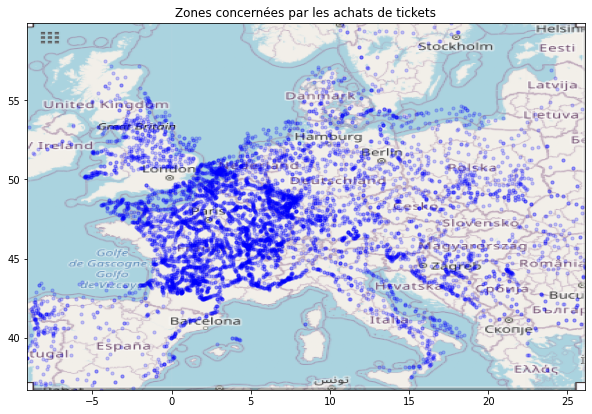

In [34]:
fig, ax = plt.subplots(figsize = (10,15))
ax.scatter(df_city.longitude, df_city.latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Zones concernées par les achats de tickets')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

<h1>Prix et distance Minimum Maximum et moyenne par trajet 

In [35]:
df_tick2 = df_ticket[['o_city','d_city' ,'Duree_min', 'price_in_cents','type_transp']].copy()

In [36]:
df_tick2

,o_city,d_city,Duree_min,price_in_cents,type_transp
0,611,542,10.0,4550,carpooling
1,611,542,50.0,1450,bus
2,611,542,57.0,7400,train
3,611,542,35.0,13500,train
4,611,542,46.0,7710,train
...,...,...,...,...,...
74163,628,562,30.0,2590,bus
74164,628,562,30.0,2700,bus
74165,628,562,45.0,3000,bus
74166,628,562,45.0,2880,bus


In [37]:
df_duree_min_trajet_global=df_tick2.groupby(['o_city','d_city']).agg(["max", "min","mean"])
df_duree_min_trajet_global

Duree_min                  price_in_cents                     
                    max   min       mean            max    min          mean
o_city d_city                                                               
5      23          57.0  53.0  54.800000          22000  18600  20320.000000
6      227         24.0   1.0  12.500000          13650   9860  11755.000000
       504         55.0   0.0  19.400000           8920   2000   4042.666667
       628         40.0   5.0  25.000000           3190   2600   2797.500000
       845         50.0   0.0  16.925373           2420    700    864.626866
...                 ...   ...        ...            ...    ...           ...
11938  126         55.0   0.0  24.444444           5350   3000   4204.861111
12124  1064        10.0  10.0  10.000000           7900   6000   6950.000000
12166  857         55.0  55.0  55.000000           5300   5300   5300.000000
12190  639         50.0  10.0  22.222222            850    600    688.888889
       8937        10.0  10.0  10.000000           9800   9800   9800.000000

[1437 rows x 6 columns]

<h1>Détail sur Prix et distance Minimum Maximum et moyenne par trajet 

In [38]:
df_tick2.groupby(['o_city','d_city']).max().reset_index()

,o_city,d_city,Duree_min,price_in_cents,type_transp
0,5,23,57.0,22000,train
1,6,227,24.0,13650,train
2,6,504,55.0,8920,train
3,6,628,40.0,3190,bus
4,6,845,50.0,2420,carpooling
...,...,...,...,...,...
1432,11938,126,55.0,5350,carpooling
1433,12124,1064,10.0,7900,carpooling
1434,12166,857,55.0,5300,bus
1435,12190,639,50.0,850,carpooling


In [39]:
df_tick2.groupby(['o_city','d_city']).min().reset_index()

,o_city,d_city,Duree_min,price_in_cents,type_transp
0,5,23,53.0,18600,train
1,6,227,1.0,9860,train
2,6,504,0.0,2000,bus
3,6,628,5.0,2600,bus
4,6,845,0.0,700,bus
...,...,...,...,...,...
1432,11938,126,0.0,3000,bus
1433,12124,1064,10.0,6000,bus
1434,12166,857,55.0,5300,bus
1435,12190,639,10.0,600,carpooling


In [40]:
df_tick2.groupby(['o_city','d_city']).mean().reset_index()

,o_city,d_city,Duree_min,price_in_cents
0,5,23,54.800000,20320.000000
1,6,227,12.500000,11755.000000
2,6,504,19.400000,4042.666667
3,6,628,25.000000,2797.500000
4,6,845,16.925373,864.626866
...,...,...,...,...
1432,11938,126,24.444444,4204.861111
1433,12124,1064,10.000000,6950.000000
1434,12166,857,55.000000,5300.000000
1435,12190,639,22.222222,688.888889


<h1>Différence de prix moyen et durée selon le type de transport 

In [41]:
df_tick4 = df_ticket[['Duree_min', 'price_in_cents','type_transp']].copy()

In [42]:
df_tick4.groupby(['type_transp']).agg(["max", "min","mean"])

Duree_min                 price_in_cents                  
                  max  min       mean            max  min         mean
type_transp                                                           
bus              59.0  0.0  27.951225          22900  850  3652.448036
carpooling       50.0  0.0  25.812601          16150  300  2742.171907
train            59.0  0.0  29.756670          38550  490  8506.634793

In [43]:
df_tick4.groupby(['type_transp']).max().reset_index()

,type_transp,Duree_min,price_in_cents
0,bus,59.0,22900
1,carpooling,50.0,16150
2,train,59.0,38550


In [44]:
df_tick4.groupby(['type_transp']).min().reset_index()

,type_transp,Duree_min,price_in_cents
0,bus,0.0,850
1,carpooling,0.0,300
2,train,0.0,490


In [45]:
df_tick4.groupby(['type_transp']).mean().reset_index()

,type_transp,Duree_min,price_in_cents
0,bus,27.951225,3652.448036
1,carpooling,25.812601,2742.171907
2,train,29.756670,8506.634793


<h1>Différence de prix moyen et durée la distance du trajet (0-200km, 201-800km, 800-2000km, 2000+km) 

In [65]:
df_tick3 = df_ticket[['Distance_km' ,'Duree_min', 'price_in_cents','type_transp']].copy()

In [66]:
df_tick3

,Distance_km,Duree_min,price_in_cents,type_transp
0,503.136831,10.0,4550,carpooling
1,503.136831,50.0,1450,bus
2,503.136831,57.0,7400,train
3,503.136831,35.0,13500,train
4,503.136831,46.0,7710,train
...,...,...,...,...
74163,339.046766,30.0,2590,bus
74164,339.046766,30.0,2700,bus
74165,339.046766,45.0,3000,bus
74166,339.046766,45.0,2880,bus


In [67]:
def calcul_distance_min(distance):
    if distance<=200:
        return 0
    elif (distance>200) and  (distance<=800):
        return 200
    elif (distance>800) and  (distance<=2000):
        return 800
    else:
        return 2000
df_tick3['intervalle_min']=df_tick3['Distance_km'].apply(calcul_distance_min)

In [68]:
def calcul_distance_max(distance):
    if distance<=200:
        return 200
    elif (distance>200) and  (distance<=800):
        return 800
    elif (distance>800) and  (distance<=2000):
        return 2000
    else:
        return 10000
df_tick3['intervalle_max']=df_tick3['Distance_km'].apply(calcul_distance_max)

In [69]:
df_tick3

,Distance_km,Duree_min,price_in_cents,type_transp,intervalle_min,intervalle_max
0,503.136831,10.0,4550,carpooling,200,800
1,503.136831,50.0,1450,bus,200,800
2,503.136831,57.0,7400,train,200,800
3,503.136831,35.0,13500,train,200,800
4,503.136831,46.0,7710,train,200,800
...,...,...,...,...,...,...
74163,339.046766,30.0,2590,bus,200,800
74164,339.046766,30.0,2700,bus,200,800
74165,339.046766,45.0,3000,bus,200,800
74166,339.046766,45.0,2880,bus,200,800


In [51]:
df_tick3.groupby(['intervalle_max','intervalle_min']).agg(["max", "min","mean"])

Distance_km                         Duree_min  \
                                       max         min        mean       max   
intervalle_max intervalle_min                                                  
200            0                199.085694   18.962318  131.659511      59.0   
800            200              798.544558  200.566830  400.836668      59.0   
2000           800             1875.174971  803.402293  984.549392      59.0   

                                              price_in_cents        \
                               min       mean            max   min   
intervalle_max intervalle_min                                        
200            0               0.0  26.402069          25100   300   
800            200             0.0  27.404980          38550   850   
2000           800             0.0  27.294193          37550  1940   

                                            
                                      mean  
intervalle_max intervalle_min               
200            0               1678.972311  
800            200             4893.836592  
2000           800             8857.869177

In [52]:
df_tick3.groupby(['intervalle_max','intervalle_min']).min()

,,Distance_km,Duree_min,price_in_cents
intervalle_max,intervalle_min,,,
200,0,18.962318,0.0,300
800,200,200.566830,0.0,850
2000,800,803.402293,0.0,1940


In [53]:
df_tick3.groupby(['intervalle_max','intervalle_min']).max()

,,Distance_km,Duree_min,price_in_cents
intervalle_max,intervalle_min,,,
200,0,199.085694,59.0,25100
800,200,798.544558,59.0,38550
2000,800,1875.174971,59.0,37550


<h1>Quelques visualisation

In [54]:
import seaborn as sns

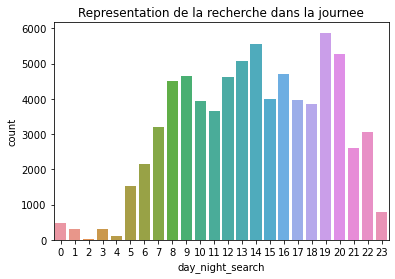

In [55]:
fig=plt.figure()
axes=plt.axes()
graphe=sns.countplot(x='day_night_search',data=df_ticket).set_title('Representation de la recherche dans la journee')
#axes.set_xticklabels(['Night','Day'])

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Sunday'),
  Text(1, 0, 'Monday'),
  Text(2, 0, 'Tuesday'),
  Text(3, 0, 'Wednesday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Friday'),
  Text(6, 0, 'Saturday')])

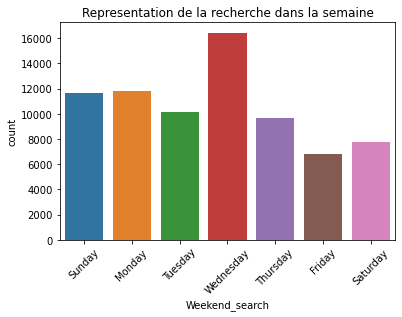

In [59]:
fig=plt.figure()
axes=plt.axes()
graphe=sns.countplot(x='Weekend_search',data=df_ticket).set_title('Representation de la recherche dans la semaine')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Friday'),
  Text(1, 0, 'Sunday'),
  Text(2, 0, 'Monday'),
  Text(3, 0, 'Saturday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Tuesday'),
  Text(6, 0, 'Wednesday')])

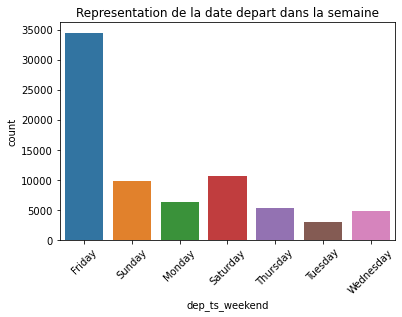

In [61]:
fig=plt.figure()
axes=plt.axes()
graphe=sns.countplot(x='dep_ts_weekend',data=df_ticket).set_title('Representation de la date depart dans la semaine')
plt.xticks(rotation=45)

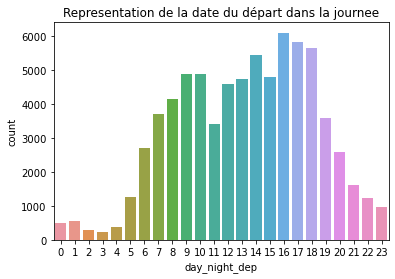

In [62]:
fig=plt.figure()
axes=plt.axes()
graphe=sns.countplot(x='day_night_dep',data=df_ticket).set_title('Representation de la date du départ dans la journee')

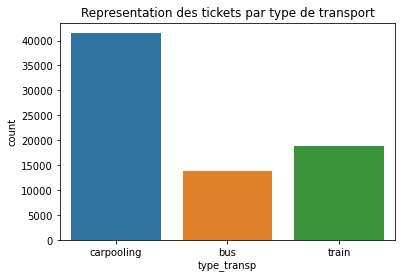

In [63]:
fig=plt.figure()
axes=plt.axes()
graphe=sns.countplot(x='type_transp',data=df_ticket).set_title('Representation des tickets par type de transport')

Text(0.5, 1.0, 'Percentage des tickets vendus par type de transport')

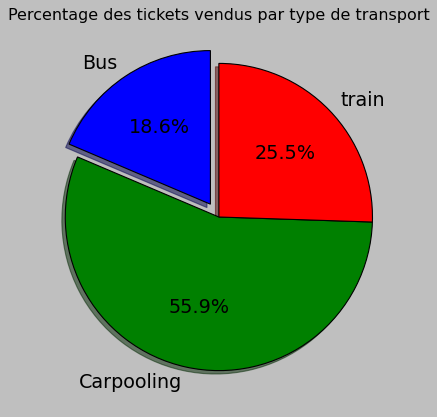

In [103]:
tick_bus=df_ticket[df_ticket['type_transp']=='bus'].size
tick_car=df_ticket[df_ticket['type_transp']=='carpooling'].size
tick_train=df_ticket[df_ticket['type_transp']=='train'].size
labels=['Bus','Carpooling','train']
size=[tick_bus,tick_car,tick_train]
explode = (0.1, 0,0)
plt.pie(size,labels=labels,shadow=True,startangle=90,explode=explode,autopct='%1.1f%%',textprops={'size': 'x-large'})
plt.title('Percentage des tickets vendus par type de transport')

In [70]:
df_tick3

,Distance_km,Duree_min,price_in_cents,type_transp,intervalle_min,intervalle_max
0,503.136831,10.0,4550,carpooling,200,800
1,503.136831,50.0,1450,bus,200,800
2,503.136831,57.0,7400,train,200,800
3,503.136831,35.0,13500,train,200,800
4,503.136831,46.0,7710,train,200,800
...,...,...,...,...,...,...
74163,339.046766,30.0,2590,bus,200,800
74164,339.046766,30.0,2700,bus,200,800
74165,339.046766,45.0,3000,bus,200,800
74166,339.046766,45.0,2880,bus,200,800


In [72]:
df_tick3_bus=df_tick3[df_tick3['type_transp']=='bus']
df_tick3_train=df_tick3[df_tick3['type_transp']=='train']
df_tick3_car=df_tick3[df_tick3['type_transp']=='carpooling']

In [ ]:
df_tick3_car['Distance_km'].hist( color = 'red', bins = 5)
plt.style.use('fast')
plt.xlabel('Distance')

(array([10798.,  2898.,   102.]),
 array([  27.398055  ,  643.32369376, 1259.24933252, 1875.17497128]),
 <BarContainer object of 3 artists>)

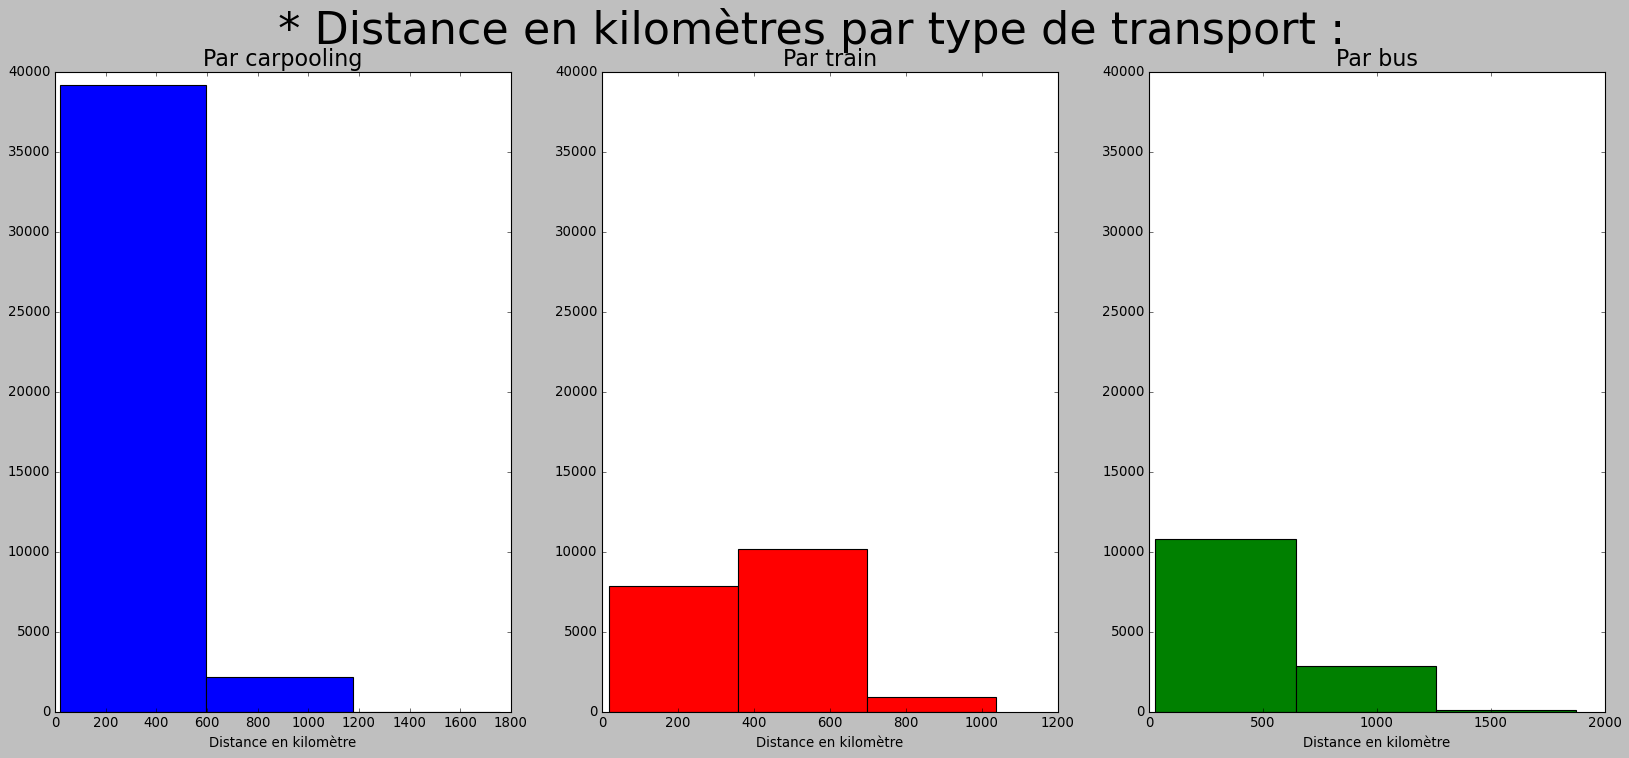

In [89]:
fig, axes = plt.subplots(1, 3, figsize=(25,10))
fig.suptitle(' * Distance en kilomètres par type de transport :', fontsize=40)
axes[0].set_title("Par carpooling", fontsize=20)
axes[1].set_title("Par train", fontsize=20)
axes[2].set_title("Par bus", fontsize=20)
axes[0].set_xlabel("Distance en kilomètre")
axes[1].set_xlabel("Distance en kilomètre")
axes[2].set_xlabel("Distance en kilomètre")
axes[0].set_ylim([0, 40000])
axes[1].set_ylim([0, 40000])
axes[2].set_ylim([0, 40000])
axes[0].hist(df_tick3_car['Distance_km'],bins=3,color = 'blue')  
axes[1].hist(df_tick3_train['Distance_km'],bins=3,color = 'red')
axes[2].hist(df_tick3_bus['Distance_km'],bins=3,color = 'green')

Text(0.5, 0, 'Distance en Kilomètres')

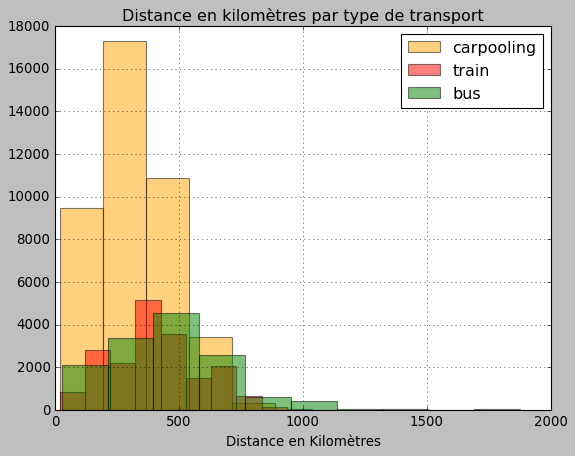

In [83]:
df_tick3_car['Distance_km'].hist(alpha = 0.5, color = 'orange', bins = 10, label='carpooling')
df_tick3_train['Distance_km'].hist(alpha = 0.5, color = 'red', bins = 10, label='train')
df_tick3_bus['Distance_km'].hist(alpha = 0.5, color = 'green', bins = 10, label='bus')
plt.style.use('fast')
plt.legend()
plt.title('Distance en kilomètres par type de transport')
plt.xlabel('Distance en Kilomètres')

In [90]:
df_city

,Unnamed: 0,id,local_name,unique_name,latitude,longitude,population,country
0,0,5159,"Padua, Veneto, Italia",padua,45.406435,11.876761,209678.0,Italia
1,1,76,"Barcelona, Cataluña, España",barcelona,41.385064,2.173404,1611822.0,España
2,2,81,"Basel, Basel-Stadt, Schweiz",basel,47.593437,7.619812,NaN,Deutschland
3,3,259,"Erlangen, Bayern, Deutschland",erlangen,49.589674,11.011961,105412.0,Deutschland
4,4,11979,"Balș, Olt, România",balș,44.353354,24.095672,NaN,România
...,...,...,...,...,...,...,...,...
8035,8035,9964,"Saint-André-lez-Lille, Hauts-de-France, France",saint-andre-lez-lille,50.654250,3.047690,NaN,France
8036,8036,10863,"Kiev, Шевченківський район, Ukraine",kiev,50.450100,30.523400,NaN,Україна
8037,8037,11144,"Brighton, England, UK",brighton,50.822000,-0.137400,NaN,United Kingdom
8038,8038,11377,"Manises, Comunitat Valenciana, España",manises,39.493000,-0.462100,NaN,España


In [115]:
def find_country(x):
    return (df_city[df_city['id']==x]['country'].values[0])
df_tick2['country_destination']=df_tick2['d_city'].apply(find_country)

In [116]:
def find_country_o(x):
    return (df_city[df_city['id']==x]['country'].values[0])
df_tick2['country_depart']=df_tick2['o_city'].apply(find_country_o)

In [117]:
def find_city_o(x):
    return (df_city[df_city['id']==x]['city'].values[0])
df_tick2['cite_depart']=df_tick2['d_city'].apply(find_city_o)

In [123]:
def find_city_d(x):
    return (df_city[df_city['id']==x]['city'].values[0])
df_tick2['cite_o']=df_tick2['o_city'].apply(find_city_d)

In [124]:
df_tick2

,o_city,d_city,Duree_min,price_in_cents,type_transp,country_destination,country_depart,cite_depart,cite_o
0,611,542,10.0,4550,carpooling,France,France,Montpellier,Orléans
1,611,542,50.0,1450,bus,France,France,Montpellier,Orléans
2,611,542,57.0,7400,train,France,France,Montpellier,Orléans
3,611,542,35.0,13500,train,France,France,Montpellier,Orléans
4,611,542,46.0,7710,train,France,France,Montpellier,Orléans
...,...,...,...,...,...,...,...,...,...
74163,628,562,30.0,2590,bus,France,France,Nantes,Paris
74164,628,562,30.0,2700,bus,France,France,Nantes,Paris
74165,628,562,45.0,3000,bus,France,France,Nantes,Paris
74166,628,562,45.0,2880,bus,France,France,Nantes,Paris


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87]),
 [Text(0, 0, 'Orléans'),
  Text(1, 0, 'Paris'),
  Text(2, 0, 'La Rochelle'),
  Text(3, 0, 'Dijon'),
  Text(4, 0, 'Genève'),
  Text(5, 0, 'Toulon'),
  Text(6, 0, 'Bordeaux'),
  Text(7, 0, 'Lille'),
  Text(8, 0, "Les Sables-d'Olonne"),
  Text(9, 0, 'Lyon'),
  Text(10, 0, 'Rouen'),
  Text(11, 0, 'Amiens'),
  Text(12, 0, 'Pau'),
  Text(13, 0, 'Avignon'),
  Text(14, 0, 'Marseille'),
  Text(15, 0, 'Limoges'),
  Text(16, 0, 'Rennes'),
  Text(17, 0, 'Metz'),
  Text(18, 0, 'Toulouse'),
  Text(19, 0, 'Annecy'),
  Text(20, 0, 'Caen'),
  Text(21, 0, 'Clermont-Ferrand'),
  Text(22, 0, 'Besançon'),
  Text

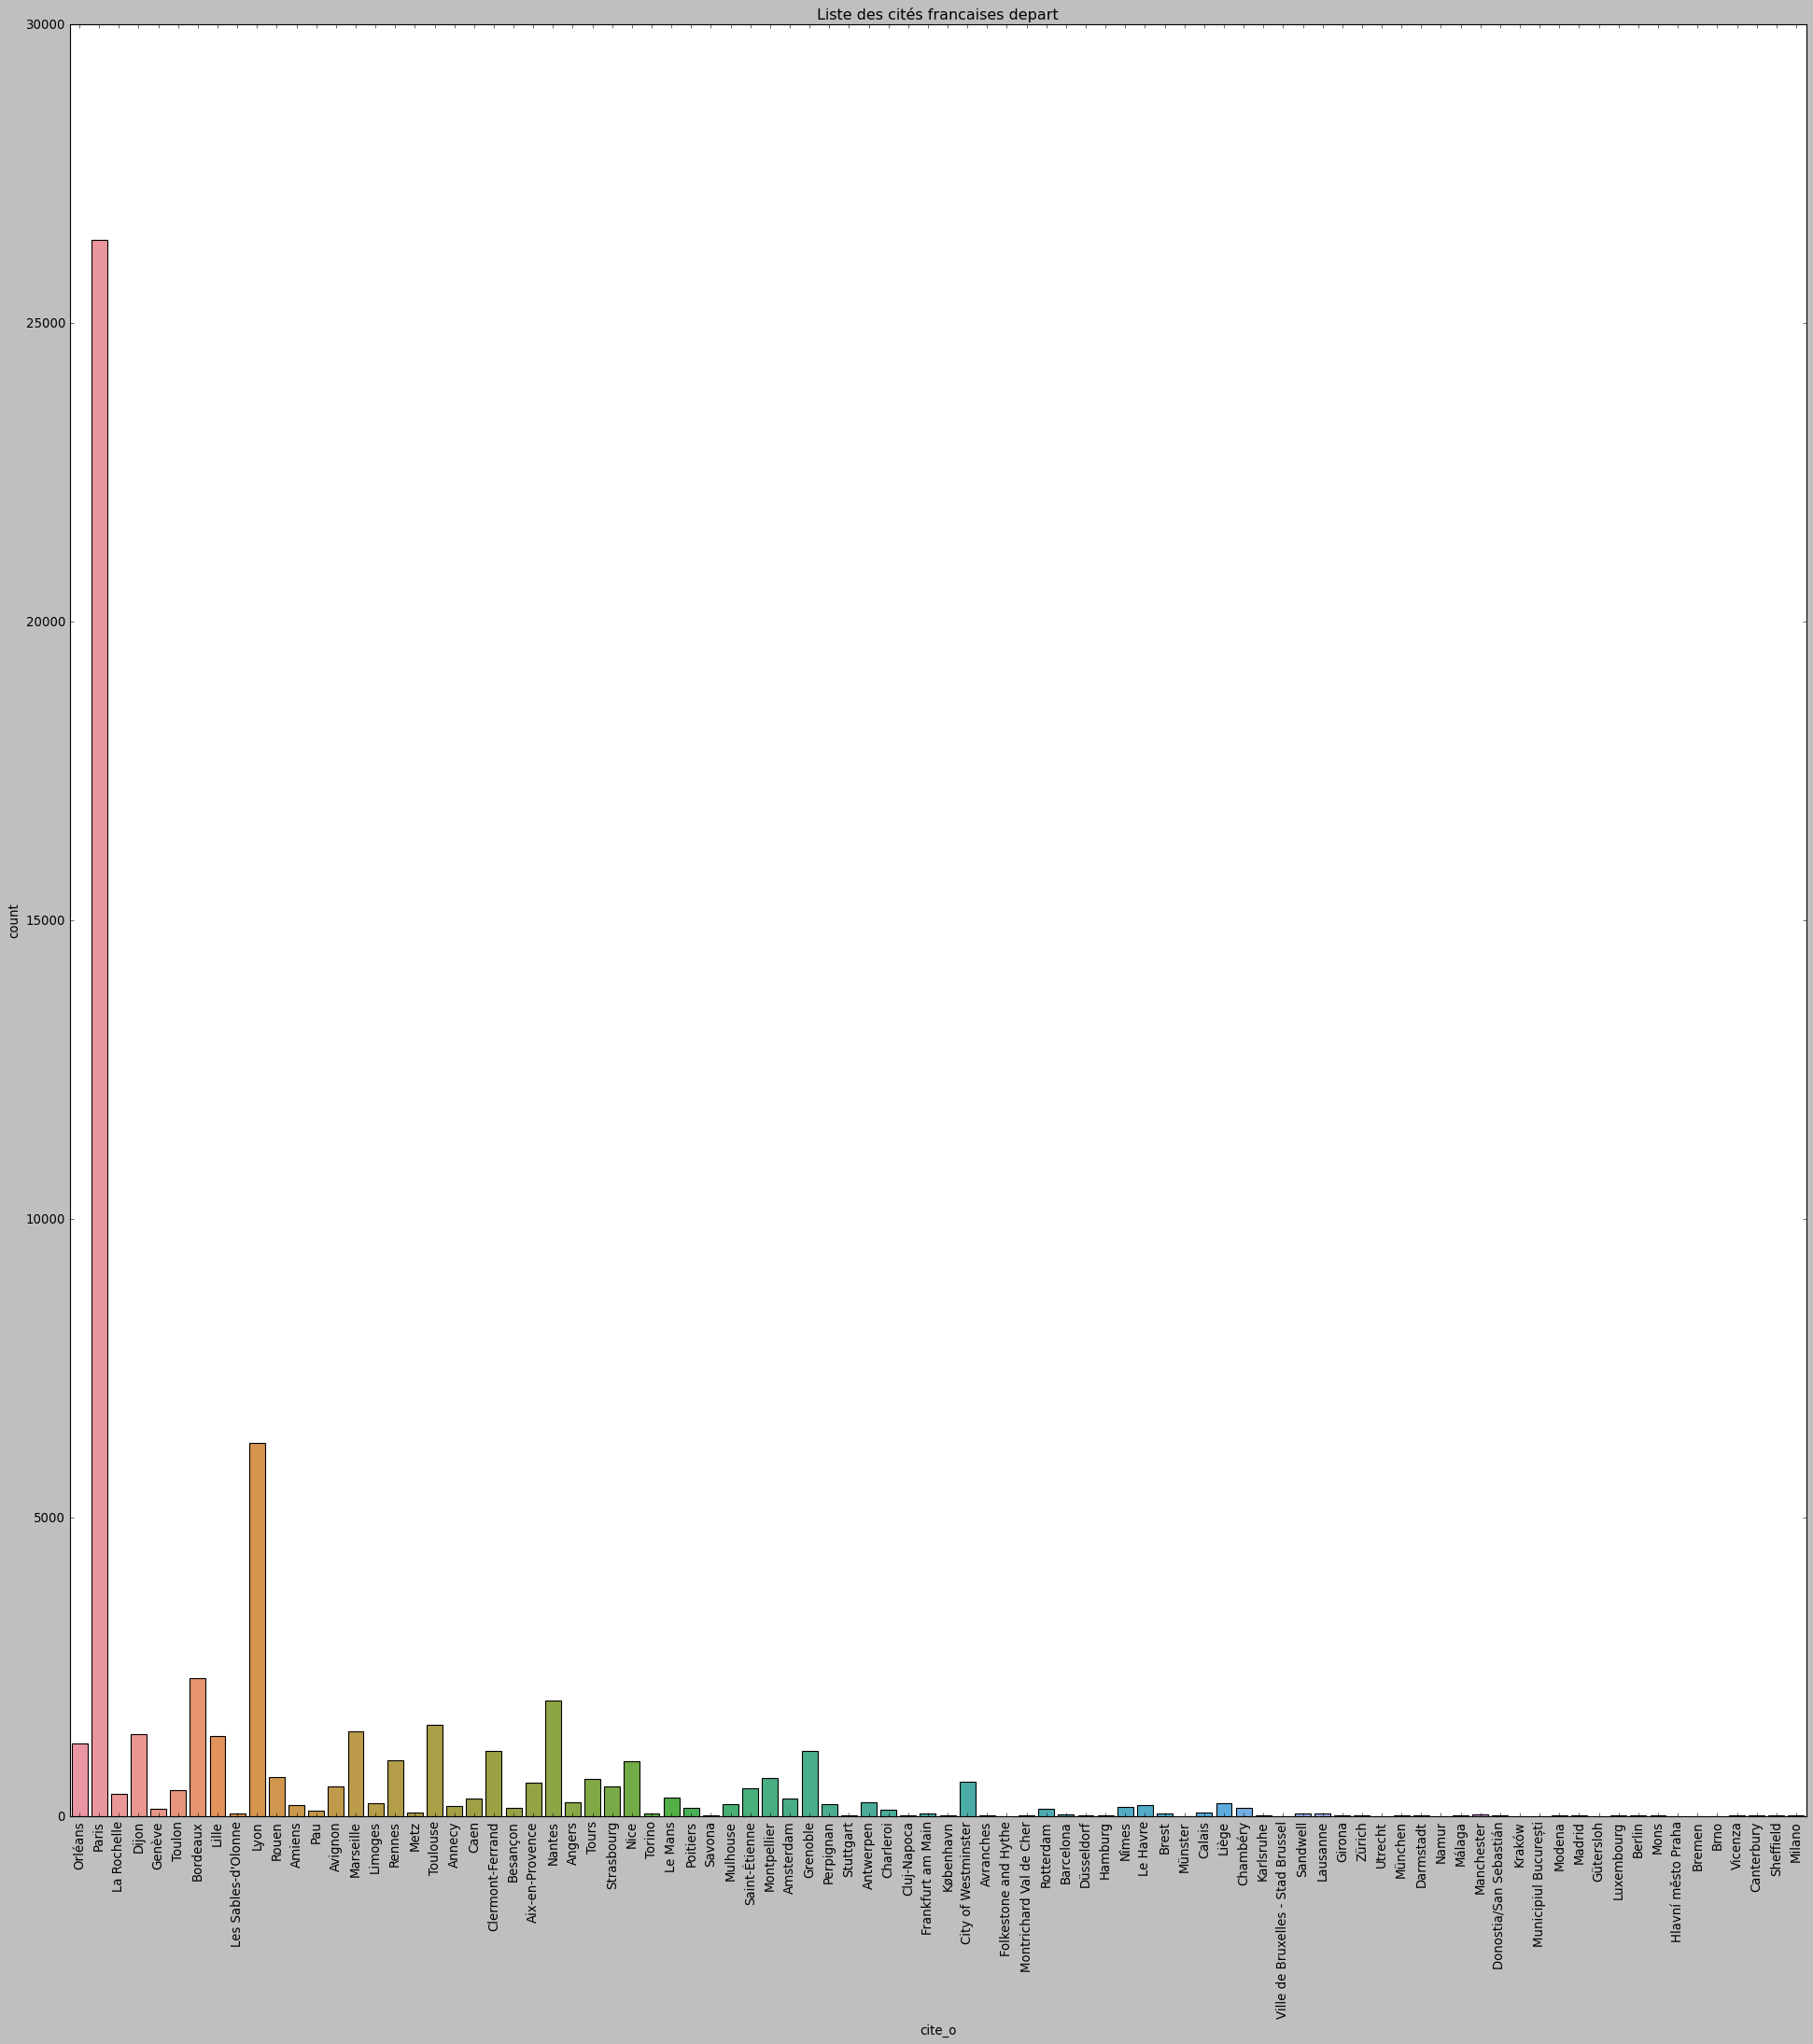

In [126]:
plt.figure(figsize=(30,30))
graphe=sns.countplot(x='cite_o',data=df_tick2[df_tick2['country_destination']=='France']).set_title('Liste des cités francaises depart')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 [Text(0, 0, 'Montpellier'),
  Text(1, 0, 'Lille'),
  Text(2, 0, 'Rennes'),
  Text(3, 0, 'Bordeaux'),
  Text(4, 0, 'Lyon'),
  Text(5, 0, 'Paris'),
  Text(6, 0, 'Saint-Étienne'),
  Text(7, 0, 'Marseille'),
  Text(8, 0, "Les Sables-d'Olonne"),
  Text(9, 0, 'Rouen'),
  Text(10, 0, 'Nantes'),
  Text(11, 0, 'Hauts de Bienne'),
  Text(12, 0, 'Avignon'),
  Text(13, 0, 'Pau'),
  Text(14, 0, 'Toulouse'),
  Text(15, 0, 'Nîmes'),
  Text(16, 0, 'Grenoble'),
  Text(17, 0, 'La Rochelle'),
  Text(18, 0, 'Aix-en-Provence'),
  Text(19, 0, 'Toulon'),
  Text(20, 0, 'Dijon'),
  Text(21, 0, 'Besançon'),
  Text(22, 0, 'Perpignan'),
  Text(23, 0, 'Amiens'),
  Text(24, 0, 'Strasbourg'),
  Text(25, 0, 'Annecy'),
  Text(26, 0, 'Clermont-Ferrand'),
  Text(27, 0, 'Tours'),
  Text(28, 0, 'Caen'),
  Text(29, 0, 'Orlé

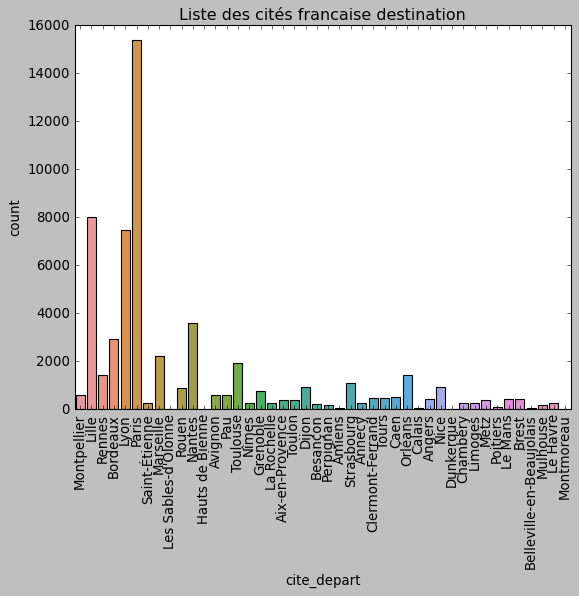

In [122]:
fig=plt.figure()
axes=plt.axes()
graphe=sns.countplot(x='cite_depart',data=df_tick2[df_tick2['country_destination']=='France']).set_title('Liste des cités francaises destination')
plt.xticks(rotation=90)

In [133]:
df_tick_fr = df_ticket[['o_city','d_city' ,'Duree_min', 'price_in_cents','type_transp','lat_o','long_o']].copy()

In [134]:
def find_country(x):
    return (df_city[df_city['id']==x]['country'].values[0])
df_tick_fr['country_destination']=df_tick_fr['d_city'].apply(find_country)

In [135]:
def find_country_o(x):
    return (df_city[df_city['id']==x]['country'].values[0])
df_tick_fr['country_depart']=df_tick_fr['o_city'].apply(find_country_o)

In [136]:
df_tick_fr=df_tick_fr[df_tick_fr['country_destination']=='France']
df_tick_fr

,o_city,d_city,Duree_min,price_in_cents,type_transp,lat_o,long_o,country_destination,country_depart
0,611,542,10.0,4550,carpooling,47.907018,1.906270,France,France
1,611,542,50.0,1450,bus,47.907018,1.906270,France,France
2,611,542,57.0,7400,train,47.907018,1.906270,France,France
3,611,542,35.0,13500,train,47.907018,1.906270,France,France
4,611,542,46.0,7710,train,47.907018,1.906270,France,France
...,...,...,...,...,...,...,...,...,...
74163,628,562,30.0,2590,bus,48.847702,2.352311,France,France
74164,628,562,30.0,2700,bus,48.847702,2.352311,France,France
74165,628,562,45.0,3000,bus,48.847702,2.352311,France,France
74166,628,562,45.0,2880,bus,48.847702,2.352311,France,France


In [143]:
ruh_m1 = plt.imread('cartefrance.png')

In [140]:
from matplotlib.collections import LineCollection

In [144]:
BBox1 = ((-5.713,   13.711,      
         42.261, 51.536))

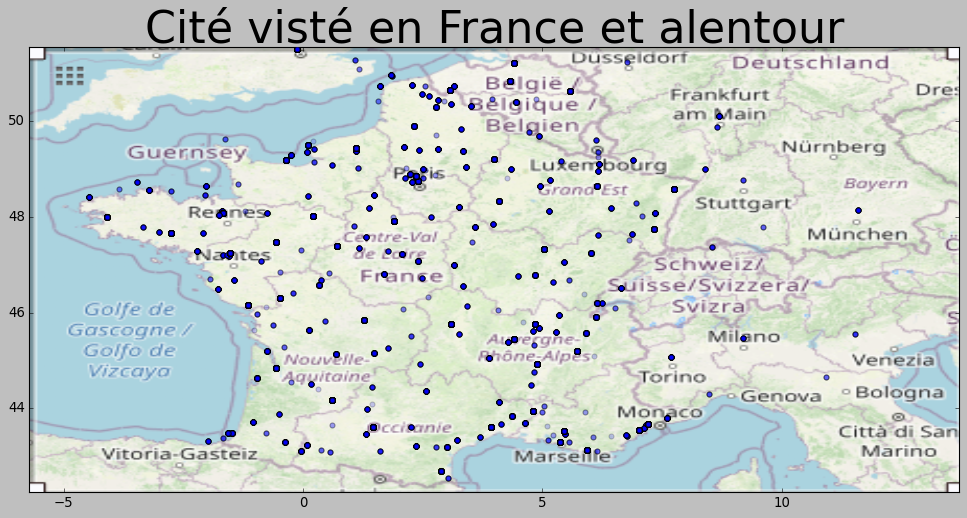

In [150]:
fig, ax = plt.subplots(figsize = (15,25))
ax.scatter(df_tick_fr.long_o, df_tick_fr.lat_o, zorder=4, alpha= 0.2, c='b', s=20)
ax.set_title('Cité visté en France et alentour', fontsize=40)
ax.set_xlim(BBox1[0],BBox1[1])
ax.set_ylim(BBox1[2],BBox1[3])
ax.imshow(ruh_m1, zorder=0, extent = BBox1, aspect= 'equal')

In [156]:
df_ticket_provider_info=df_ticket[['company']].copy()

In [158]:
def find_bicycle(x):
    return (df_providers[df_providers['id']==x]['has_bicycle'].values[0])
df_ticket_provider_info['bicycle']=df_ticket_provider_info['company'].apply(find_bicycle)

In [161]:
def find_blug(x):
    return (df_providers[df_providers['id']==x]['has_plug'].values[0])
df_ticket_provider_info['plug']=df_ticket_provider_info['company'].apply(find_blug)

In [162]:
def find_seat(x):
    return (df_providers[df_providers['id']==x]['has_adjustable_seats'].values[0])
df_ticket_provider_info['seats_ajustable']=df_ticket_provider_info['company'].apply(find_seat)

In [163]:
def find_wifi(x):
    return (df_providers[df_providers['id']==x]['has_wifi'].values[0])
df_ticket_provider_info['wifi']=df_ticket_provider_info['company'].apply(find_wifi)

In [164]:
df_ticket_provider_info

,company,bicycle,plug,seats_ajustable,wifi
0,8385,False,False,False,False
1,9,False,True,True,True
2,8377,False,False,True,False
3,8377,False,False,True,False
4,8381,False,False,True,False
...,...,...,...,...,...
74163,13,False,False,False,True
74164,9,False,True,True,True
74165,8371,False,True,True,True
74166,13,False,False,False,True


Text(0.5, 1.0, 'Wifi')

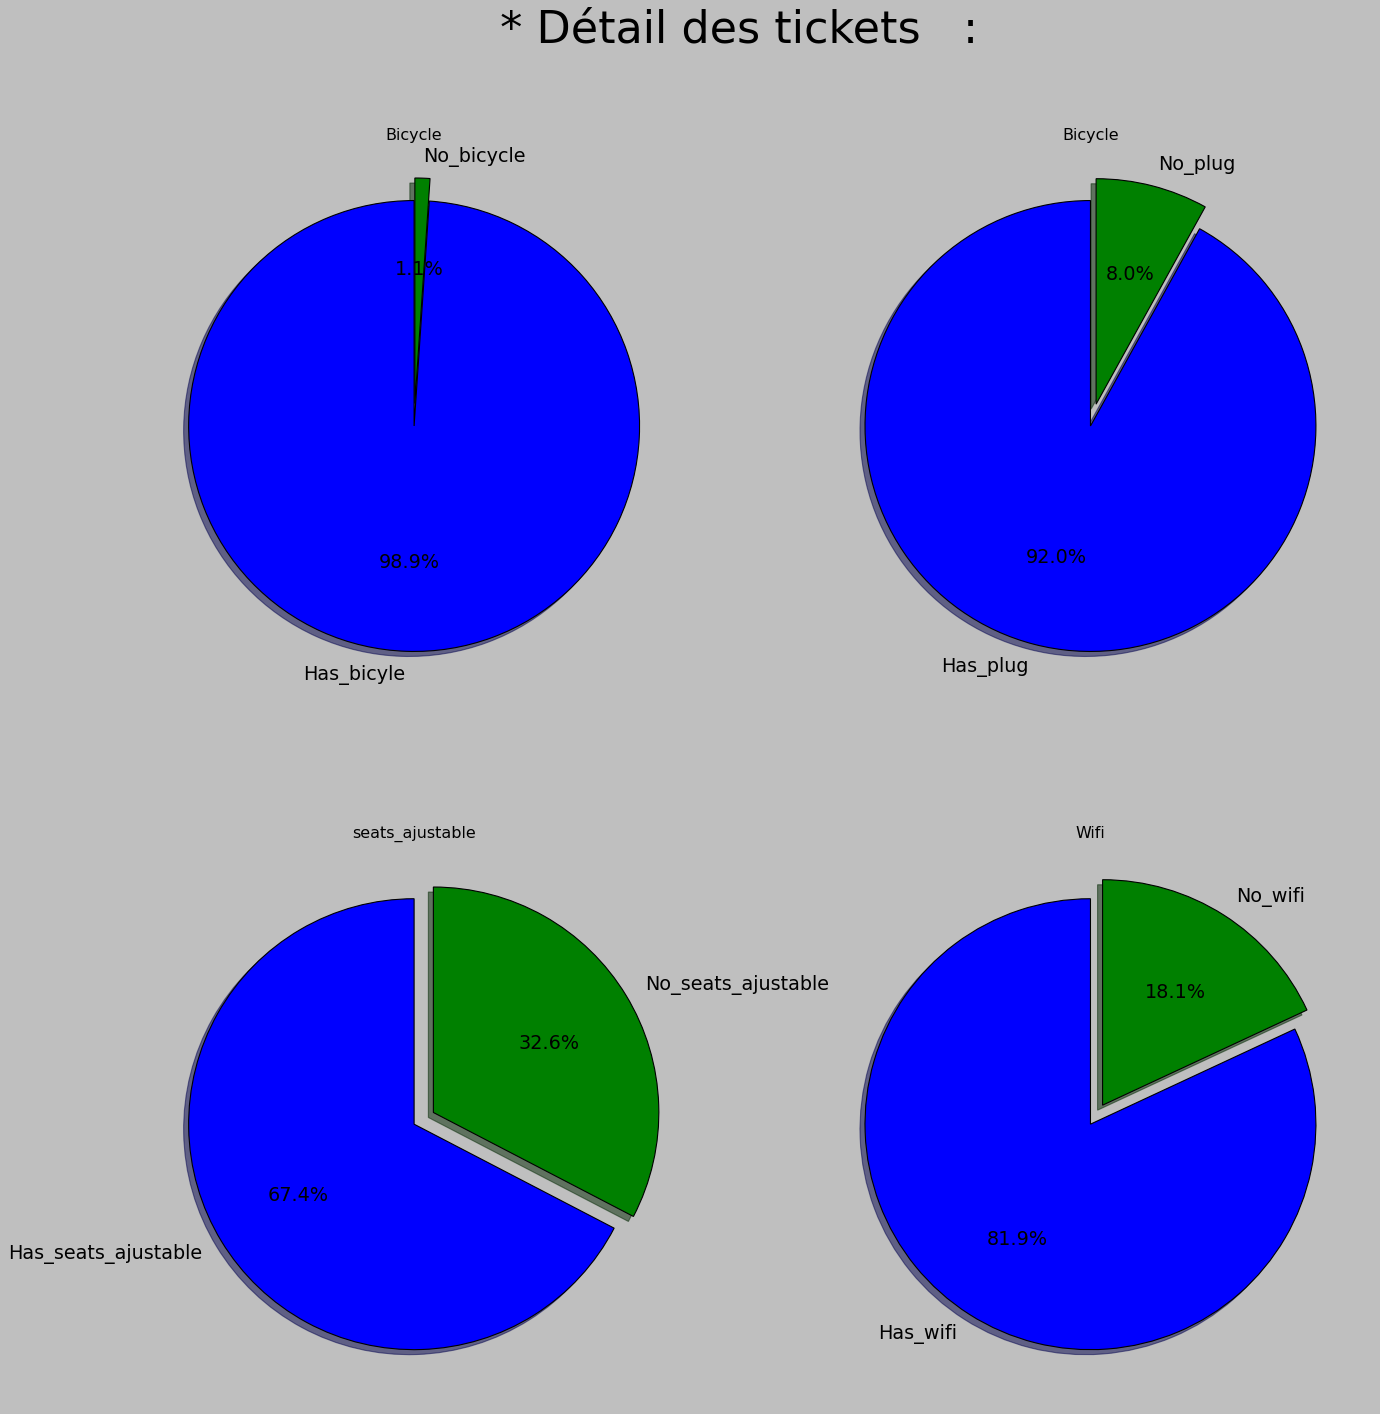

In [165]:
fig, axes = plt.subplots(2, 2, figsize=(20,20))
fig.suptitle(' * Détail des tickets   :', fontsize=40)
nb_bic_no=df_ticket_provider_info[df_ticket_provider_info['bicycle']==False].size
nb_bic_tr=df_ticket_provider_info[df_ticket_provider_info['bicycle']==True].size
labels='Has_bicyle','No_bicycle'
size=[nb_bic_no,nb_bic_tr]
explode = (0, 0.1)
axes[0][0].pie(size,labels=labels,shadow=True,startangle=90,explode=explode,autopct='%1.1f%%',textprops={'size': 'x-large'})
axes[0][0].set_title('Bicycle')

nb_b_no=df_ticket_provider_info[df_ticket_provider_info['plug']==False].size
nb_b_tr=df_ticket_provider_info[df_ticket_provider_info['plug']==True].size
labels='Has_plug','No_plug'
size=[nb_b_no,nb_b_tr]
explode = (0, 0.1)
axes[0][1].pie(size,labels=labels,shadow=True,startangle=90,explode=explode,autopct='%1.1f%%',textprops={'size': 'x-large'})
axes[0][1].set_title('Bicycle')

nb_s_no=df_ticket_provider_info[df_ticket_provider_info['seats_ajustable']==False].size
nb_s_tr=df_ticket_provider_info[df_ticket_provider_info['seats_ajustable']==True].size
labels='Has_seats_ajustable','No_seats_ajustable'
size=[nb_s_no,nb_s_tr]
explode = (0, 0.1)
axes[1][0].pie(size,labels=labels,shadow=True,startangle=90,explode=explode,autopct='%1.1f%%',textprops={'size': 'x-large'})
axes[1][0].set_title('seats_ajustable')

nb_w_no=df_ticket_provider_info[df_ticket_provider_info['wifi']==False].size
nb_w_tr=df_ticket_provider_info[df_ticket_provider_info['wifi']==True].size
labels='Has_wifi','No_wifi'
size=[nb_w_no,nb_w_tr]
explode = (0, 0.1)
axes[1][1].pie(size,labels=labels,shadow=True,startangle=90,explode=explode,autopct='%1.1f%%',textprops={'size': 'x-large'})
axes[1][1].set_title('Wifi')

C:\Users\salma\Anaconda3\envs\MPDS\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\salma\Anaconda3\envs\MPDS\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\salma\Anaconda3\envs\MPDS\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\U

<AxesSubplot:xlabel='seats_ajustable', ylabel='count'>

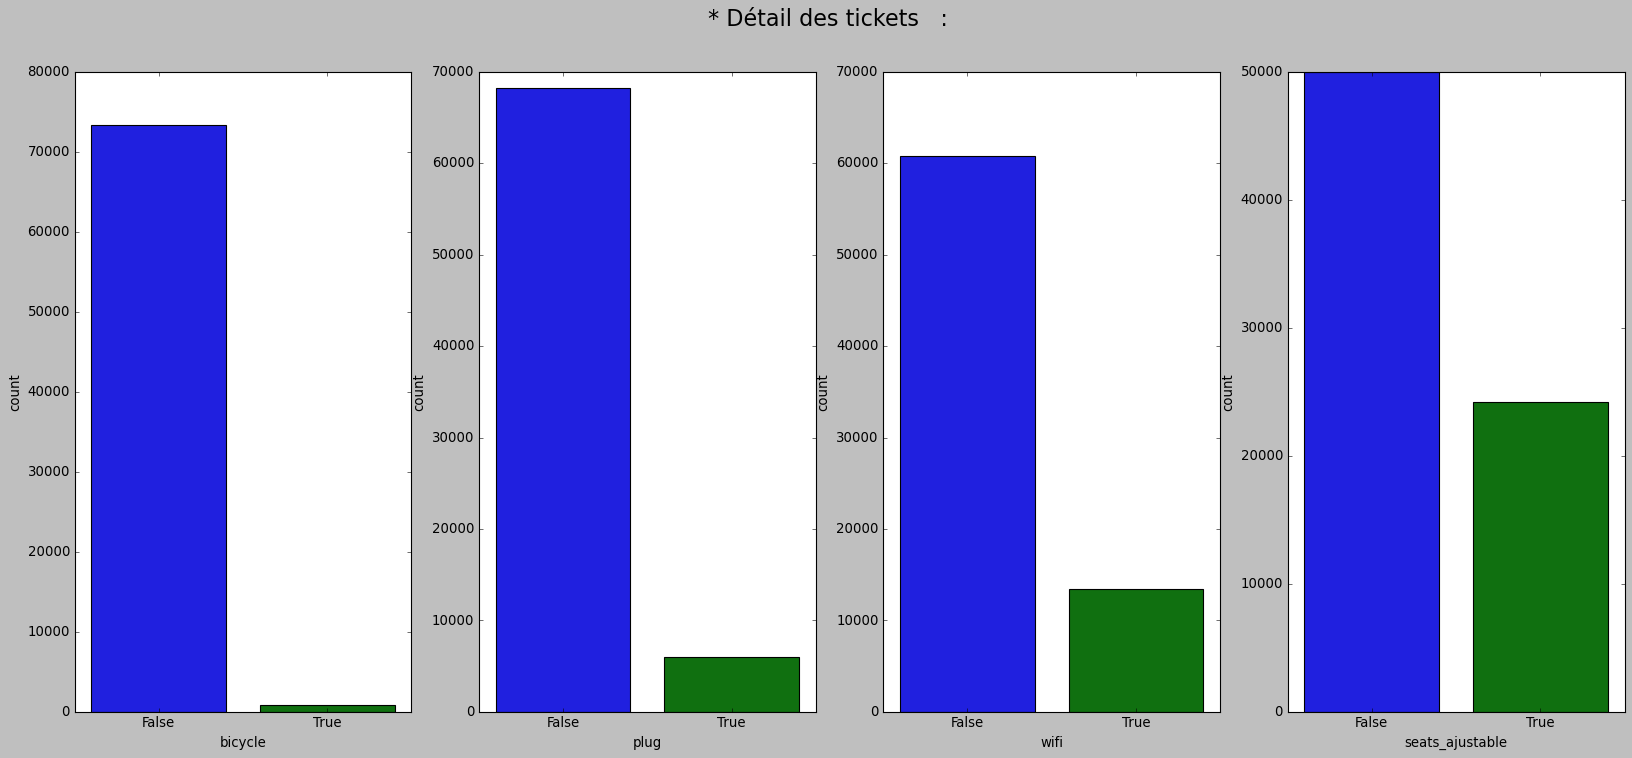

In [171]:
#fig, axes = plt.subplots(2, 2, figsize=(25,10))
fig, ax =plt.subplots(1,4,figsize=(25,10))
fig.suptitle(' * Détail des tickets   :', fontsize=20)
x_pos=[1.25,2]
x=['OUI','NON']
sns.countplot(df_ticket_provider_info['bicycle'], ax=ax[0])
sns.countplot(df_ticket_provider_info['plug'], ax=ax[1])
sns.countplot(df_ticket_provider_info['wifi'], ax=ax[2])
sns.countplot(df_ticket_provider_info['seats_ajustable'], ax=ax[3])
